In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')
df.head(3)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0


In [3]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [4]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [12]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [13]:
y_predicted = log_model.predict(X_test)

In [17]:
y_predicted_probability = log_model.predict_proba(X_test)
y_predicted_probability[0]

array([0.02380517, 0.97619483])

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [24]:
accuracy_score(y_test, y_predicted)

0.93

In [25]:
precision_score(y_test, y_predicted)

0.9331210191082803

In [26]:
recall_score(y_test, y_predicted)

0.9543973941368078

In [27]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay

<Figure size 640x480 with 0 Axes>

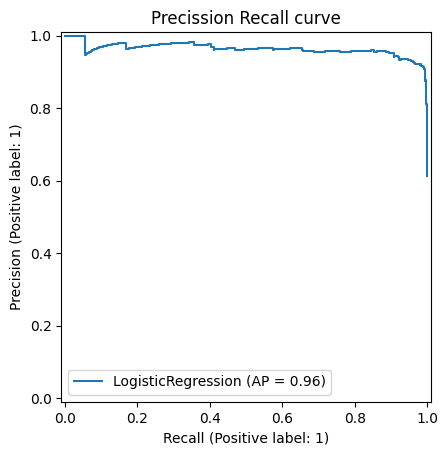

In [30]:
plt.clf()
disp = PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test)
plt.title('Precission Recall curve')

# precision, recall, _ = precision_recall_curve(y_test, log_model.predict_proba(X_test)[:, 1])
# plt.ylim(bottom=precision.mean(), top=1.0)

plt.show()

<Figure size 640x480 with 0 Axes>

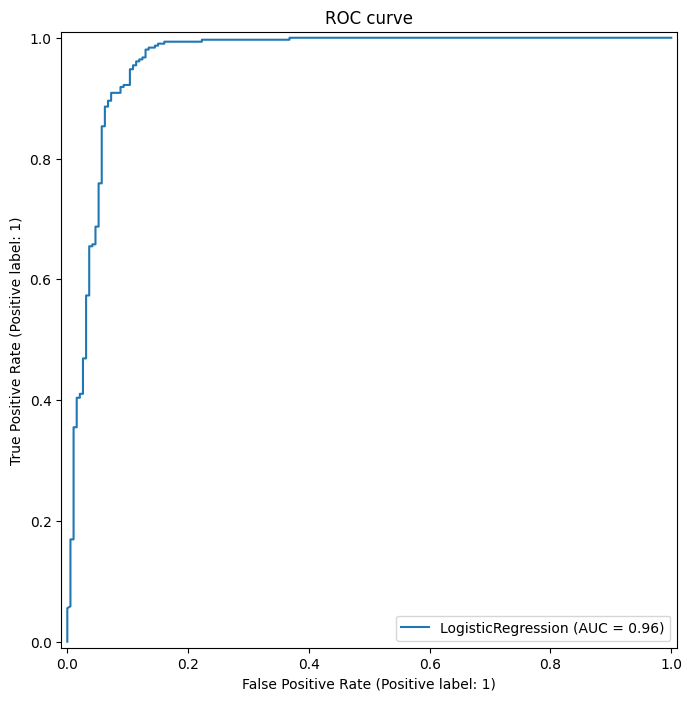

In [34]:
plt.clf()
fig, ax = plt.subplots(figsize=(12, 8))
RocCurveDisplay.from_estimator(log_model, X_test, y_test, ax=ax)
plt.title('ROC curve')

plt.show()

In [35]:
log_model.predict_proba(X_test)[0]

array([0.02380517, 0.97619483])

In [36]:
y_test[0]

np.int64(1)

In [37]:
log_model.predict(X_test)[0]

np.int64(1)